In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 4 Basic Visualizations

Load in each data file:

In [593]:
data = np.loadtxt('data/data.txt', skiprows=0, delimiter='\t', dtype='int')
test = np.loadtxt('data/test.txt', skiprows=0, delimiter='\t', dtype='int')
train = np.loadtxt('data/train.txt', skiprows=0, delimiter='\t', dtype='int')
movies = np.loadtxt('data/movies.txt', skiprows=0, delimiter='\t', dtype='str')

### 1

Create a histogram of all the ratings in the dataset. First, put all the ratings into a list and then plot. 

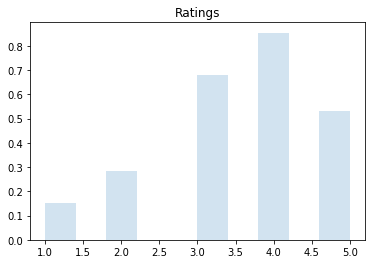

In [3]:
ratings = []
for element in data:
    ratings.append(int(element[2]))

plt.hist(ratings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings')
plt.show()

### 2

First, we will determine the 10 most popular movies. To do this, we will go through the data dataset and determine the number of ratings that each movie has received

In [4]:
totalRatings = {}
for element in data:
    if element[1] in totalRatings:
        totalRatings[element[1]] += 1
    else:
        totalRatings[element[1]] = 1

Now, convert the dictionary to a list and sort by the number of ratings:

In [5]:
ratingList = []

for item in totalRatings.items():
    ratingList.append(item)
    
ratingList.sort(key=lambda x: x[1], reverse=True)

Print out the 10 most popular movies:

In [6]:
ratingList[:10]

[(50, 583),
 (258, 509),
 (100, 508),
 (181, 507),
 (294, 485),
 (286, 481),
 (288, 478),
 (1, 452),
 (300, 431),
 (121, 429)]

Create a dictionary for the ten most popular movies, find all the ratings, and plot as a histogram:

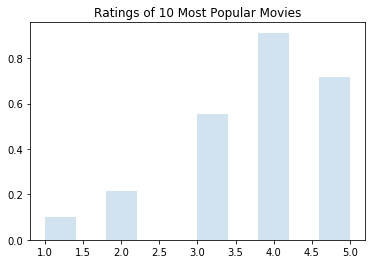

In [7]:
popular = {}
for item in ratingList[:10]:
    popular[item[0]] = True
    
popularRatings = []
for element in data:
    if element[1] in popular:
        popularRatings.append(int(element[2]))

plt.hist(popularRatings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings of 10 Most Popular Movies')
plt.show()

### 3

Find the average ratings of each movie and sort a list by the best rated:

In [8]:
avgRatings = {}
for element in data:
    if element[1] in avgRatings:
        avgRatings[element[1]][0] += int(element[2])
        avgRatings[element[1]][1] += 1
    else:
        avgRatings[element[1]] = [int(element[2]), 1]

        
avgRatingList = []

for key, value in avgRatings.items():
    avgRatingList.append((key, value[0] / float(value[1])))
    
avgRatingList.sort(key=lambda x: x[1], reverse=True)

Print out the 10 best rated movies:

In [9]:
avgRatingList[:10]

[(1189, 5.0),
 (1500, 5.0),
 (814, 5.0),
 (1536, 5.0),
 (1293, 5.0),
 (1599, 5.0),
 (1653, 5.0),
 (1467, 5.0),
 (1122, 5.0),
 (1201, 5.0)]

Create a dictionary for the ten best rated movies, find all the ratings, and plot as a histogram:

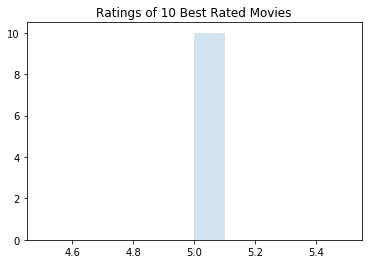

In [10]:
best = {}
for item in avgRatingList[:10]:
    best[item[0]] = True
    
bestRatings = []
for element in data:
    if element[1] in best:
        bestRatings.append(int(element[2]))

plt.hist(bestRatings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings of 10 Best Rated Movies')
plt.show()

### 4

We choose to do the genres Comedy, Western, and Romance.

In [11]:
print(movies[0])

['1' 'Toy Story (1995)' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0']


In [12]:
print(movies)

[['1' 'Toy Story (1995)' '0' ..., '0' '0' '0']
 ['2' 'GoldenEye (1995)' '0' ..., '1' '0' '0']
 ['3' 'Four Rooms (1995)' '0' ..., '1' '0' '0']
 ..., 
 ['1680' 'Sliding Doors (1998)' '0' ..., '0' '0' '0']
 ['1681' 'You So Crazy (1994)' '0' ..., '0' '0' '0']
 ['1682' 'Scream of Stone (Schrei aus Stein) (1991)' '0' ..., '0' '0' '0']]


Find all the movies that are comedy, western, and/or animation:

In [13]:
genres = {'Comedy':[], 'Western':[], 'Animation':[]}
for movie in movies:
    if movie[7] == '1':
        genres['Comedy'].append(int(movie[0]))
    if movie[20] == '1':
        genres['Western'].append(int(movie[0]))
    if movie[16] == '1':
        genres['Animation'].append(int(movie[0]))

For the movies in each category, find all the ratings and plot a histogram:

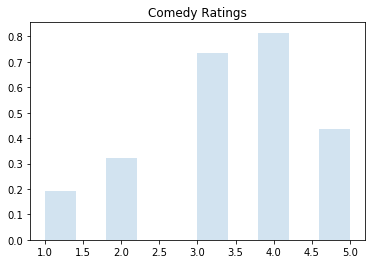

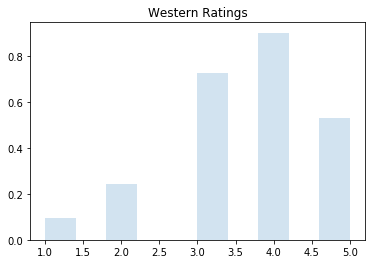

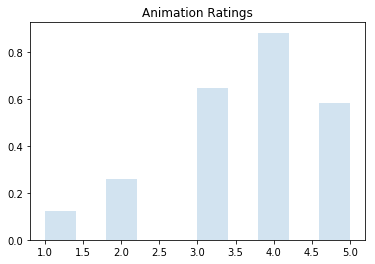

In [14]:
for genre in genres.keys():
    genre_ratings = []
    temp = genres[genre]
    for element in data:
        if element[1] in temp:
            genre_ratings.append(int(element[2]))
    title = genre + ' Ratings'
    plt.hist(genre_ratings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
    plt.title(title)
    plt.show()

### 5 Matrix Factorization Visualizations

### Part 1

Below is my code from Homework 5:

In [417]:
import numpy as np

def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta * (reg * Ui - np.dot(Vj, (Yij - np.dot(Ui, Vj))))
       
def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * (reg * Vj - np.dot(Ui, (Yij - np.dot(Ui, Vj))))

def get_err(U, V, Y, reg=0.1):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    
    # Sum of the squared loss
    summation = 0
    for element in Y:
        i = element[0]
        j = element[1]
        Y_ij = element[2]
        summation += ((Y_ij - np.dot(U[i - 1], V[j - 1])) ** 2)
    
    # Norm squared U 
    fro_U = 0
    for x in range(len(U)):
        for y in range(len(U[0])):
            fro_U += (U[x][y] ** 2)

    # Norm squared V 
    fro_V = 0
    for x in range(len(V)):
        for y in range(len(V[0])):
            fro_V += (V[x][y] ** 2)
    
    # Divide by the length of Y since its mean squared error
    return ((reg / 2) * (fro_U + fro_V) + 0.5 * summation) / len(Y)

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    
    U = []
    V = []
    
    # Initialize the U and V matrixes
    for i in range(M):
        temp = []
        for j in range(K):
            temp.append(np.random.uniform(-0.5, 0.5))
        U.append(temp)
        
    for i in range(N):
        temp = []
        for j in range(K):
            temp.append(np.random.uniform(-0.5, 0.5))
        V.append(temp)   
    U = np.array(U)
    V = np.array(V)
    
    # Now, run the algorithm
    loss_reduct_0 = 0
    loss_prev = get_err_without_bias(U, V, Y)
    for i in range(max_epochs):
        
        # Shuffle order of datapoints
        indices = np.random.permutation(len(Y))
        for index in indices:
            
            # Update U using the ith row of U. The data is 1 indexed so we must change this to 
            # 0 indexed
            U[Y[index][0] - 1] = U[Y[index][0] - 1] - grad_U(U[Y[index][0] - 1], Y[index][2], V[Y[index][1] - 1], reg, eta)
            
            # Update V using the jth column of V
            V[Y[index][1] - 1] = V[Y[index][1] - 1] - grad_V(V[Y[index][1] - 1], Y[index][2], U[Y[index][0] - 1], reg, eta)

        if i == 0:
            loss_reduct_0 = loss_prev - get_err_without_bias(U, V, Y)
        
        if (loss_prev - get_err(U, V, Y)) / loss_reduct_0 <= eps:
            break
            
        loss_prev = get_err_without_bias(U, V, Y)
        print(i)
    
    # Calculate mean unregularized error
    summation = 0
    for element in Y:
        i = element[0]
        j = element[1]
        Y_ij = element[2]
        summation += ((Y_ij - np.dot(U[i - 1], V[j - 1])) ** 2)
        
    return (U, V, summation / (2 * len(Y)))

We will use a regularization parameter of $\lambda=0.1$ since this performed best on the test set in the homework. Our stop criteria will be 300 epochs since this is probably enough epochs to converge if the model is able to converge to a particular value, and our other stop condition will be if the change over an epoch is very small relative to the change over the first epoch, which indicates that the model has basically converged.

1 Train data using Matrix Factorization code from Assignment 5.

In [429]:
import random
import numpy as np

def grad_U_without_bias(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    #summation = Vj * (Yij - (np.dot(Ui, Vj)))

    summation = Vj * (Yij - (np.dot(Ui, Vj)))
    #answer = (reg * Ui) - summation
    answer = (reg * Ui) - summation
    #print(answer)
    return answer * eta

def grad_V_without_bias(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    #summation = Ui * (Yij - (np.dot(Ui, Vj)))

    summation = Ui * (Yij - (np.dot(Ui, Vj)))
    #answer = (reg * Vj) - summation
    answer = (reg * Vj) - summation
    #print(answer)
    return answer * eta

def get_err_without_bias(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    error = 0
    for n in range(0, len(Y)):
        i = Y[n][0] - 1
        j = Y[n][1] - 1
        Yij = Y[n][2]
        Ui = U[i]
        Vj = V[j]
        est = np.dot(Ui, Vj)
        error += ((Yij - est)**2)

    error /= 2
    regularized = error + ((reg/2)*(np.linalg.norm(U)**2 + np.linalg.norm(V)**2))
    print(regularized/len(Y))
    return regularized/len(Y)


def train_model_without_bias(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """

    
    # Create U and V arrays
    U = (np.random.uniform(-0.5, 0.5, (M, K)))

    V = (np.random.uniform(-0.5, 0.5, (N, K)))
    

    indices = list(range(0, len(Y)))
    init_error = get_err_without_bias(U, V, Y, reg)
    
    for epoch in range(0, max_epochs):
        print("epoch = ", epoch)
        
        # Shuffle the points, so that in random order, 
        # iterate through all points and update
        # the weight vector. 

        indices = np.random.permutation(indices)

        for m in range(0, len(indices)):
            i = Y[indices[m]][0] - 1
            j = Y[indices[m]][1] - 1
            Yij = Y[indices[m]][2]
        
        #calculate the gradient and update model parameters
            gradU = grad_U_without_bias(U[i], Yij, V[j], reg, eta)
            gradV = grad_V_without_bias(V[j], Yij, U[i], reg, eta)
            U[i] = U[i] - gradU
            V[j] = V[j] - gradV
        
        new_error = get_err_without_bias(U, V, Y, reg)

        if epoch == 0:
            first_reduction = init_error - new_error;
            old_error = new_error

        else:
            if np.abs((old_error - new_error)/first_reduction) <= eps:
                break
            else:
                old_error = new_error

    return U, V, new_error

In [431]:
U, V, new_error = train_model_without_bias(943, 1682, 20, 0.1, 0, train, 0.0001, 300)

6.9284450372
epoch =  0
0.656686018781
epoch =  1
0.58854622728
epoch =  2
0.55625054055
epoch =  3
0.539857181131
epoch =  4
0.519326276385
epoch =  5
0.507478364805
epoch =  6
0.515074105748
epoch =  7
0.489623450875
epoch =  8
0.519489605101
epoch =  9
0.500393802297
epoch =  10
0.491017570544
epoch =  11
0.494042494554
epoch =  12
0.48824677139
epoch =  13
0.494876232675
epoch =  14
0.47553009261
epoch =  15
0.480392974061
epoch =  16
0.478378147661
epoch =  17
0.474910602811
epoch =  18
0.488215163752
epoch =  19
0.500890251662
epoch =  20
0.489997970387
epoch =  21
0.47257354611
epoch =  22
0.474536635849
epoch =  23
0.481995319172
epoch =  24
0.47083795565
epoch =  25
0.488994530833
epoch =  26
0.470811514821
epoch =  27
0.48079311194
epoch =  28
0.469106189373
epoch =  29
0.48052787247
epoch =  30
0.471070005277
epoch =  31
0.45920098648
epoch =  32
0.473461475923
epoch =  33
0.470487965203
epoch =  34
0.46931956125
epoch =  35
0.46890092016


In [436]:
prediction = np.dot(U, V.transpose())
print(prediction)

[[ 4.22381636  3.64274999  3.77668225 ...,  1.54075732  3.22220436
   3.28336708]
 [ 2.77246783  3.1245539   1.13943126 ...,  1.61803919  2.6637318
   1.47391324]
 [ 2.49111991  1.66087024  3.22285201 ...,  0.58972194  1.28578989
   1.83016543]
 ..., 
 [ 4.13345452  4.082472    2.38160197 ...,  0.64151153  2.45662775
   1.60594438]
 [ 4.53018722  4.31943325  2.25888738 ...,  1.86303685  2.70792469
   2.26596496]
 [ 2.26416488  3.4060158   3.04513834 ...,  1.08341944  2.44794449
   0.76678631]]


2 Train with matrix factorization with bias.

Attempt3

3 Using an Off-the-Shelf Implementation from SkLearn, train using the sklearn implementation of matrix factorization.

1 Apply SVD

In [534]:
import surprise
import os
import pandas as pd
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

In [608]:
# Create a pandas dataframe to hold the data in order to load it into the scikit-learn SVD.
ratings_dict = {'user': data[:, 0],
                'movie': data[:, 1],
                'rating': data[:, 2]}
df = pd.DataFrame(ratings_dict)

# A reader is needed to read the pandas dataframe.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
dataset = Dataset.load_from_df(df[['user', 'movie', 'rating']], reader)

#kf = KFold(n_splits=)
#for trainset, testset in kf.split(dataset):

#     algo = surprise.prediction_algorithms.matrix_factorization.SVD(biased = False, lr_all = 0.005, reg_all = 0.1)
#     algo.fit(trainset)
#     predictions = algo.test(testset)

#     # Compute and print Root Mean Squared Error
#     accuracy.rmse(predictions, verbose=True)

algo = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors = 20, biased = False, lr_all = 0.005, reg_all = 0.1)

algo.fit(dataset.build_full_trainset())
#predictions = algo.test(tset)

# Compute and print Root Mean Squared Error
#accuracy.rmse(predictions, verbose=True)



[[ 3.76403722  3.99066446  2.13181589 ...,  0.54614542  0.81159358
   0.60216132]
 [ 3.80272136  3.95606591  2.19456462 ...,  0.54119257  0.80084698
   0.57168266]
 [ 4.04305501  4.14030782  2.07722629 ...,  0.60578542  0.73818036
   0.66379351]
 ..., 
 [ 3.16884236  3.28261648  1.77726664 ...,  0.3143288   0.65383582
   0.42090551]
 [ 3.51835382  3.61892348  1.97068509 ...,  0.41278598  0.65722039
   0.49067432]
 [ 4.18194426  4.4768125   2.3113608  ...,  0.57877525  1.00580361
   0.59391692]]
(2, 1682)
(2, 20)


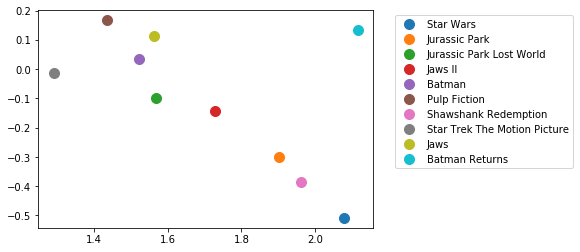

In [631]:
P = algo.pu
Q = algo.qi

U = P
V = Q.transpose()

surprise_pred = np.dot(U, V)
print(surprise_pred)

u1, s1, v1 = np.linalg.svd(U, full_matrices = False)
u2, s2, v2 = np.linalg.svd(V, full_matrices = False)

two_columns_U = np.array(u1[:, :2])
two_columns_V = np.array(u2[:, :2])

U_tilda = np.dot(two_columns_U.transpose(), U)
V_tilda = np.dot(two_columns_V.transpose(), V)

U_tilda = np.array(U_tilda)
V_tilda = np.array(V_tilda)

print(V_tilda.shape)
print(U_tilda.shape)

plt.plot([V_tilda[0][49]], [V_tilda[1][49]], 'o', markersize=10, label='Star Wars')
plt.plot([V_tilda[0][81]], [V_tilda[1][81]], 'o', markersize=10, label='Jurassic Park')
plt.plot([V_tilda[0][251]], [V_tilda[1][251]], 'o', markersize=10, \
         label='Jurassic Park Lost World')
plt.plot([V_tilda[0][451]], [V_tilda[1][451]], 'o', markersize=10, label='Jaws II')
plt.plot([V_tilda[0][402]], [V_tilda[1][402]], 'o', markersize=10, \
         label='Batman')
plt.plot([V_tilda[0][55]], [V_tilda[1][55]], 'o', markersize=10, label='Pulp Fiction')
plt.plot([V_tilda[0][63]], [V_tilda[1][63]], 'o', markersize=10, \
         label='Shawshank Redemption')
plt.plot([V_tilda[0][448]], [V_tilda[1][448]], 'o', markersize=10, label='Star Trek \
The Motion Picture')
plt.plot([V_tilda[0][233]], [V_tilda[1][233]], 'o', markersize=10, label='Jaws')
plt.plot([V_tilda[0][230]], [V_tilda[1][230]], 'o', markersize=10, label='Batman Returns')

plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()

In [611]:

get_err_without_bias(Q, Q, train, reg=0.0)

1.20038582772


1.20038582772178

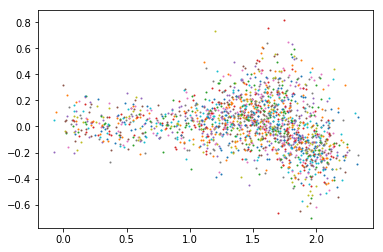

In [632]:
for element in movies:
    index = int(element[0])
    label = movies[index - 1][1]
    plt.plot(V_tilda[0][index - 1], V_tilda[1][index - 1], 'o', markersize = 1, label = label)
    
plt.show()
    

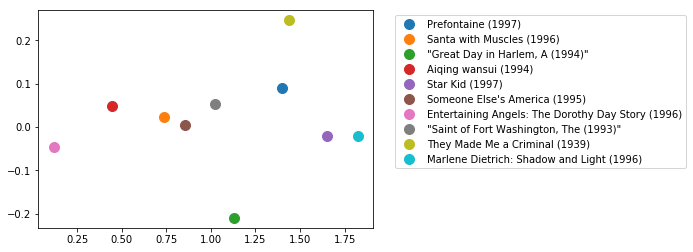

In [633]:
for element in avgRatingList[:10]:
    index = element[0]
    label = movies[index - 1][1]
    plt.plot([V_tilda[0][index - 1]], \
             [V_tilda[1][index - 1]], 'o', markersize=10, label=label)

plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()

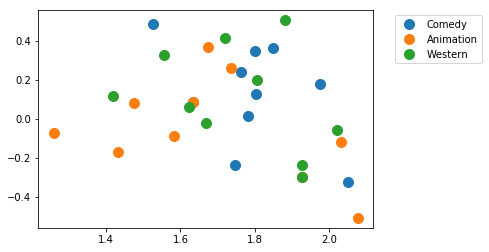

In [634]:
# Find the movie IDs
comedy = []
western = []
animation = []

i = 0
j = 0
k = 0
for item in movies:
    if i == 10 and j == 10 and k == 10:
        break
        
    # Append the movie ID
    if int(item[7]) == 1 and i < 10:
        comedy.append(int(item[0]))
        i += 1
    if int(item[16]) == 1 and j < 10:
        animation.append(int(item[0]))
        j += 1
    if int(item[20]) == 1 and k < 10:
        western.append(int(item[0]))
        k += 1

# Find the values in V_tilda corresponding
# to the movies. Each of the arrays below
# will contain separate arrays that correspond to 
# V_tilda's columns
comedy2 = [[], []]
western2 = [[], []]
animation2 = [[], []]

for element in comedy:
    index = element
    comedy2[0].append(V_tilda[0][index - 1])
    comedy2[1].append(V_tilda[1][index - 1])

for element in western:
    index = element
    western2[0].append(V_tilda[0][index - 1])
    western2[1].append(V_tilda[1][index - 1])

for element in animation:
    index = element
    animation2[0].append(V_tilda[0][index - 1])
    animation2[1].append(V_tilda[1][index - 1])

# Now, plot the values
plt.plot(comedy2[0], \
         comedy2[1], 'o', markersize=10, label='Comedy')

plt.plot(animation2[0], \
         animation2[1], 'o', markersize=10, label='Animation')

plt.plot(western2[0], \
         western2[1], 'o', markersize=10, label='Western')

plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()

Extra Exploratory Data Analysis

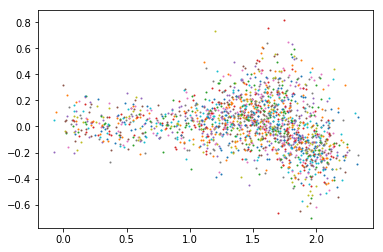

In [635]:
for element in movies:
    index = int(element[0])
    label = movies[index - 1][1]
    plt.plot([V_tilda[0][index - 1]], \
             [V_tilda[1][index - 1]], 'o', markersize=1, label=label)

#plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()

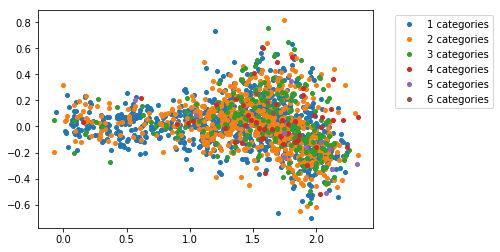

In [636]:
# there are 18 categories excluding unknown
ratings = []
for i in range(18):
    ratings.append([])

for element in movies:
    count = 0
    for i in range(3, 21):
        if int(element[i]) == 1:
            count += 1
    if count > 0:
        ratings[count - 1].append(int(element[0]))

ratings2 = [[[], []], [[], []], [[], []], [[], []], [[], []], [[], []]]
for i in range(6):
    for element in ratings[i]:
        index = element
        ratings2[i][0].append(V_tilda[0][index - 1])
        ratings2[i][1].append(V_tilda[1][index - 1])

for i in range(len(ratings2)):
    label = str(i + 1) + " categories"
    plt.plot(ratings2[i][0], \
             ratings2[i][1], 'o', markersize=4, label=label)
    
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()
plt.show()

In [637]:
ratings3 = [ratings2[0], ratings2[1], ratings2[2], [[], []]]

for i in range(len(ratings2[3][0])):
    ratings3[3][0].append(ratings2[3][0][i])
    ratings3[3][1].append(ratings2[3][1][i])
    
for i in range(len(ratings2[4][0])):
    ratings3[3][0].append(ratings2[4][0][i])
    ratings3[3][1].append(ratings2[4][1][i])
    
for i in range(len(ratings2[5][0])):
    ratings3[3][0].append(ratings2[5][0][i])
    ratings3[3][1].append(ratings2[5][1][i])

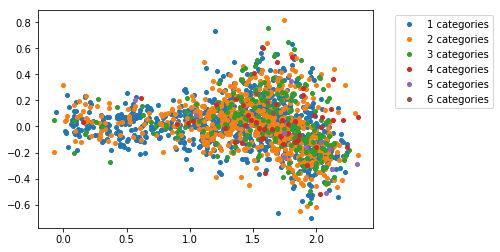

In [638]:
for i in range(len(ratings2)):
    label = str(i + 1) + " categories"
    plt.plot(ratings2[i][0], \
             ratings2[i][1], 'o', markersize=4, label=label)
    
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()
plt.show()

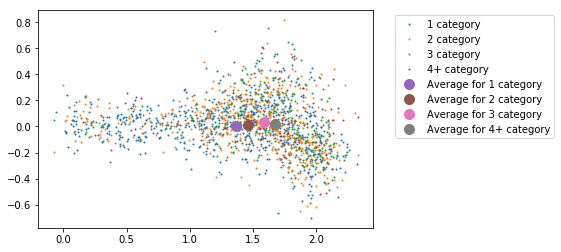

In [639]:
plt.plot(ratings3[0][0], \
         ratings3[0][1], 'o', markersize=1, label='1 category')

plt.plot(ratings3[1][0], \
         ratings3[1][1], 'o', markersize=1, label='2 category')

plt.plot(ratings3[2][0], \
         ratings3[2][1], 'o', markersize=1, label='3 category')

plt.plot(ratings3[3][0], \
         ratings3[3][1], 'o', markersize=1, label='4+ category')


plt.plot([np.mean(np.array(ratings3[0][0]))], \
         [np.mean(np.array(ratings3[0][1]))], 'o', markersize=10, \
         label='Average for 1 category')

plt.plot([np.mean(np.array(ratings3[1][0]))], \
         [np.mean(np.array(ratings3[1][1]))], 'o', markersize=10, \
         label='Average for 2 category')

plt.plot([np.mean(np.array(ratings3[2][0]))], \
         [np.mean(np.array(ratings3[2][1]))], 'o', markersize=10, \
         label='Average for 3 category')

plt.plot([np.mean(np.array(ratings3[3][0]))], \
         [np.mean(np.array(ratings3[3][1]))], 'o', markersize=10, \
         label='Average for 4+ category')

plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()

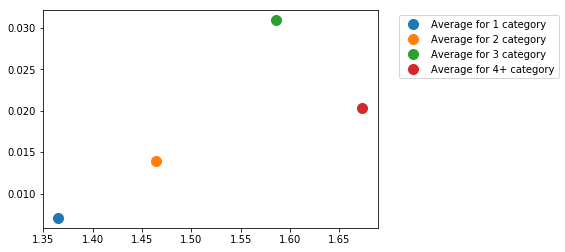

In [640]:
plt.plot([np.mean(np.array(ratings3[0][0]))], \
         [np.mean(np.array(ratings3[0][1]))], 'o', markersize=10, \
         label='Average for 1 category')

plt.plot([np.mean(np.array(ratings3[1][0]))], \
         [np.mean(np.array(ratings3[1][1]))], 'o', markersize=10, \
         label='Average for 2 category')

plt.plot([np.mean(np.array(ratings3[2][0]))], \
         [np.mean(np.array(ratings3[2][1]))], 'o', markersize=10, \
         label='Average for 3 category')

plt.plot([np.mean(np.array(ratings3[3][0]))], \
         [np.mean(np.array(ratings3[3][1]))], 'o', markersize=10, \
         label='Average for 4+ category')

plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()